# Alzheimer MRI

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
input_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Alzheimer MRI\\OriginalDataset'
output_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Alzheimer MRI\\SplitDataset'

In [6]:
DataGen=ImageDataGenerator(rescale=1/255)

In [7]:
import splitfolders
splitfolders.ratio(input=input_dir,output=output_dir,ratio=(0.8,0.1,0.1))


Copying files: 0 files [00:00, ? files/s]
Copying files: 5 files [00:00, 46.85 files/s]
Copying files: 12 files [00:00, 58.88 files/s]
Copying files: 24 files [00:00, 85.97 files/s]
Copying files: 37 files [00:00, 100.81 files/s]
Copying files: 48 files [00:00, 102.88 files/s]
Copying files: 61 files [00:00, 110.88 files/s]
Copying files: 74 files [00:00, 115.61 files/s]
Copying files: 87 files [00:00, 119.53 files/s]
Copying files: 99 files [00:00, 114.42 files/s]
Copying files: 111 files [00:01, 109.37 files/s]
Copying files: 123 files [00:01, 98.60 files/s] 
Copying files: 134 files [00:01, 99.32 files/s]
Copying files: 145 files [00:01, 101.23 files/s]
Copying files: 156 files [00:01, 50.99 files/s] 
Copying files: 165 files [00:02, 57.18 files/s]
Copying files: 177 files [00:02, 68.75 files/s]
Copying files: 187 files [00:02, 72.91 files/s]
Copying files: 199 files [00:02, 82.62 files/s]
Copying files: 211 files [00:02, 90.38 files/s]
Copying files: 222 files [00:02, 92.10 files/

In [8]:
train_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Alzheimer MRI\\SplitDataset\\train'
test_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Alzheimer MRI\\SplitDataset\\test'
val_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Alzheimer MRI\\SplitDataset\\val'

In [9]:
train_itt=DataGen.flow_from_directory(train_dir,target_size=(100, 100))
test_itt=DataGen.flow_from_directory(test_dir,target_size=(100, 100))
val_itt=DataGen.flow_from_directory(val_dir,target_size=(100, 100))

Found 5119 images belonging to 4 classes.
Found 642 images belonging to 4 classes.
Found 639 images belonging to 4 classes.


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Flatten,Dense

In [12]:
model= Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.fit(train_itt,validation_data=val_itt,epochs=8)

Epoch 1/8
160/160 [==============================] - 119s 731ms/step - loss: 0.9650 - accuracy: 0.5374 - val_loss: 0.8623 - val_accuracy: 0.6056
Epoch 2/8
160/160 [==============================] - 84s 522ms/step - loss: 0.7708 - accuracy: 0.6476 - val_loss: 0.6831 - val_accuracy: 0.7089
Epoch 3/8
160/160 [==============================] - 94s 587ms/step - loss: 0.4777 - accuracy: 0.8050 - val_loss: 0.4019 - val_accuracy: 0.8326
Epoch 4/8
160/160 [==============================] - 103s 643ms/step - loss: 0.2618 - accuracy: 0.8986 - val_loss: 0.2798 - val_accuracy: 0.8920
Epoch 5/8
160/160 [==============================] - 81s 508ms/step - loss: 0.1056 - accuracy: 0.9615 - val_loss: 0.1311 - val_accuracy: 0.9624
Epoch 6/8
160/160 [==============================] - 85s 533ms/step - loss: 0.0545 - accuracy: 0.9842 - val_loss: 0.2820 - val_accuracy: 0.8998
Epoch 7/8
160/160 [==============================] - 83s 518ms/step - loss: 0.0414 - accuracy: 0.9863 - val_loss: 0.0818 - val_accurac

<AxesSubplot:>

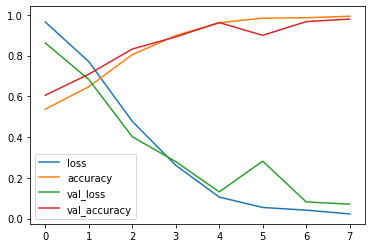

In [14]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [15]:
class_label= train_itt.class_indices
class_label

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [16]:
model.evaluate(test_itt)

21/21 [==============================] - 7s 324ms/step - loss: 0.0563 - accuracy: 0.9798


[0.056255992501974106, 0.9797507524490356]

In [17]:
model.save('Alzheimer MRI.h5')

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [19]:
def prediction(path):
    image=load_img(path,target_size=(100,100))
    plt.imshow(image)
    plt.show()
    image=img_to_array(image)
    image=image.reshape(1,100,100,3)
    result=model.predict(image)
    result=np.argmax(result)
    return print([key for key in class_label][result])

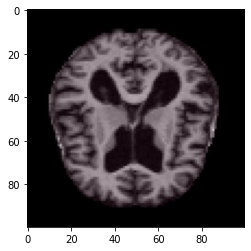

1/1 [==============================] - 0s 260ms/step
VeryMildDemented


In [20]:
prediction('00004.jpg')